<a href="https://colab.research.google.com/github/economatopoeia/stock_options/blob/master/Testing_Options_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Testing the Options Model Accuracy

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install yahoo_fin
from yahoo_fin.stock_info import *
from yahoo_fin.options import *
from datetime import date 
from datetime import datetime
import random
%load_ext google.colab.data_table
#%unload_ext google.colab.data_table  #to disable 

Warning - Certain functionality 
             requires requests_html, which is not installed.
             
             Install using: 
             pip install requests_html
             
             After installation, you may have to restart your Python session.


In [ ]:
#Importing dataframe from options 
portfolio_choices = pd.read_excel("/content/portfolio_monday.xlsx")

portfolio = portfolio_choices[(portfolio_choices.ExpectedPay > 0) & (portfolio_choices.Volume > 20) & (portfolio_choices['Open Interest'] > 20)]
portfolio['FridayPrice'] = portfolio.Ticker.apply(get_live_price)

Creating Portfolio Simulations

In [ ]:
N = 1000 
money = 10000
amount = 0
total_rows = len(portfolio)

contracts = []
sim_n = []
initial_cost = []
strike = []
new_price = []

for sim in range(N):
    amount = 0
    while amount < money:
        random_index = random.randint(0, (total_rows - 1))
        contract = portfolio.iloc[random_index]
        amount = amount + float(contract.OptionCost)
        sim_n.append(sim)
        contracts.append(contract['Contract Name'])
        initial_cost.append(contract.OptionCost)
        strike.append(contract.Strike)
        new_price.append(contract.FridayPrice)

simulations = pd.DataFrame({
    'Sim_Number' : sim_n,
    'Option' : contracts,
    'Strike' : strike,
    'Initial_Cost' : initial_cost,
    'New_Price' : new_price
})
    

Generating Return on Investment for Each Sim

In [ ]:
#Assessing their payoff:
total_returns = []

for j in range(N):
    sim = simulations[simulations.Sim_Number == j]
    gains = []
    total_investment_initial = sum(sim1.Initial_Cost)
    for row in range(len(sim)):
        contract = sim.iloc[row]
        if contract.New_Price > contract.Strike:
            investment_to_sell = 100 * contract.Strike
            selling_total = 100 * contract.New_Price
            gain = selling_total - investment_to_sell
            gains.append(gain)
        else:
            pass
    Return = sum(gains) - total_investment_initial
    total_returns.append(Return)

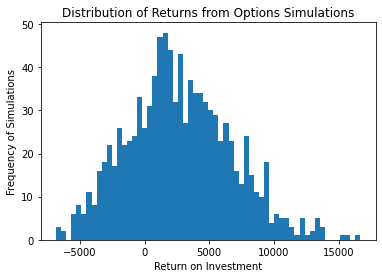

In [ ]:
plt.hist(total_returns, bins = 60)
plt.xlabel('Return on Investment')
plt.ylabel('Frequency of Simulations')
plt.title('Distribution of Returns from Options Simulations');
plt.savefig('dist_returns.png', dpi = 800)

In [ ]:
from statistics import mean, median

print(mean(total_returns))
print(median(total_returns))

2705.858557510376
2453.9957733154297
